In [35]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 


In [36]:
data = pd.read_csv("D:\\Data Science\\Assignment\\Assignment 6\\bankfull.csv")
data.head(11)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
1,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
2,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
3,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no
4,18,student,single,unknown,no,35,no,no,telephone,21,aug,104,2,-1,0,unknown,no
5,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
6,18,student,single,unknown,no,438,no,no,cellular,1,sep,425,1,-1,0,unknown,no
7,18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
8,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
9,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes
45207,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
45208,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
45209,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
45210,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no


In [39]:
data.drop(columns=['housing'], inplace=True, axis=0 )

In [40]:
data.head()

,age,job,marital,education,default,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,18,student,single,secondary,no,156,no,cellular,4,nov,298,2,82,4,other,no
1,18,student,single,primary,no,608,no,cellular,13,nov,210,1,93,1,success,yes
2,18,student,single,unknown,no,108,no,cellular,9,feb,92,1,183,1,success,yes
3,18,student,single,primary,no,1944,no,telephone,10,aug,122,3,-1,0,unknown,no
4,18,student,single,unknown,no,35,no,telephone,21,aug,104,2,-1,0,unknown,no


In [41]:
x1 = data.iloc[:,0:15]
y = data.iloc[: ,15:16]


In [42]:
x = pd.get_dummies(x1, columns=['job','marital','education','poutcome','default','loan','month','contact'])

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.3,shuffle=True)



In [44]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

c:\Users\heysr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\heysr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
classifier.intercept_


array([-0.36086975])

In [46]:
classifier.coef_

array([[-1.13807796e-02,  2.53605553e-05, -9.65174438e-03,
         3.81860983e-03, -4.21169530e-01,  1.80350526e-03,
        -1.31483188e-01, -4.21505411e-02, -3.35547415e-01,
        -3.88112439e-02, -7.87424490e-03,  1.56577750e-02,
         2.13798542e-01, -1.97808476e-02, -1.20786319e-01,
         4.55180835e-02, -8.13479697e-02,  5.00114769e-03,
         5.50195181e-03,  2.90151969e-02, -2.46583490e-01,
        -1.43252789e-01, -8.81110060e-02, -3.58314959e-01,
         7.11773563e-02,  1.44275270e-02, -1.80816855e-01,
        -3.22897452e-02,  3.95916705e-01, -5.43631186e-01,
        -3.36055262e-01, -2.47658192e-02, -1.02723634e-01,
        -2.58097447e-01,  7.38828256e-02,  4.33883451e-02,
         3.66143022e-02, -1.87474102e-02, -1.22065735e-02,
        -1.22204639e-01, -6.01070610e-02,  1.08983688e-01,
        -5.48968599e-01, -7.66924158e-02,  1.28209167e-01,
         8.70272886e-02,  1.14457202e-01,  5.90781624e-02,
        -5.34356446e-01]])

In [47]:
y_train_pred = classifier.predict(x_train)
ac = (y_train,y_train_pred)
print(ac)


(         y
32549   no
12928   no
10830   no
37950   no
26422   no
...    ...
35869  yes
41352   no
16618   no
31355   no
41987   no

[31647 rows x 1 columns], array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object))


In [48]:
y_test_pred = classifier.predict(x_test)
ac = (y_test_pred,y_test)
print(ac)

(array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object),          y
30540   no
1030    no
42047   no
3436    no
30239   no
...    ...
18637   no
31472   no
21834   no
3223    no
35857  yes

[13564 rows x 1 columns])


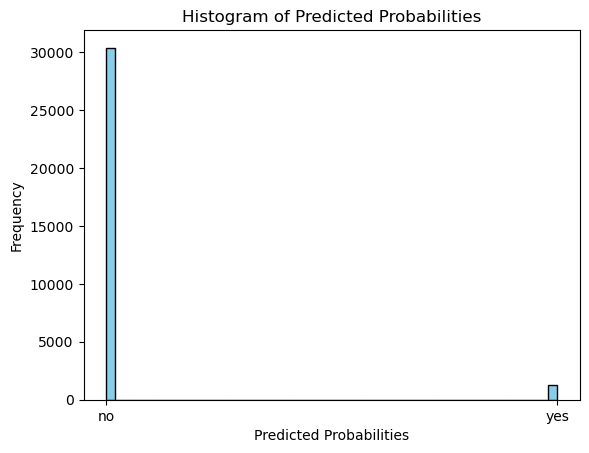

In [60]:
plt.hist(y_train_pred, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy_score
conf_matrix = confusion_matrix(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
print(conf_matrix)


[[27490   511]
 [ 2889   757]]


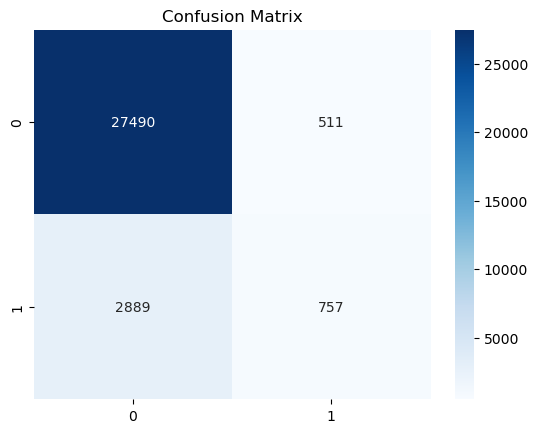

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(accuracy)

0.8925648560685057


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

          no       0.90      0.98      0.94     28001
         yes       0.60      0.21      0.31      3646

    accuracy                           0.89     31647
   macro avg       0.75      0.59      0.62     31647
weighted avg       0.87      0.89      0.87     31647



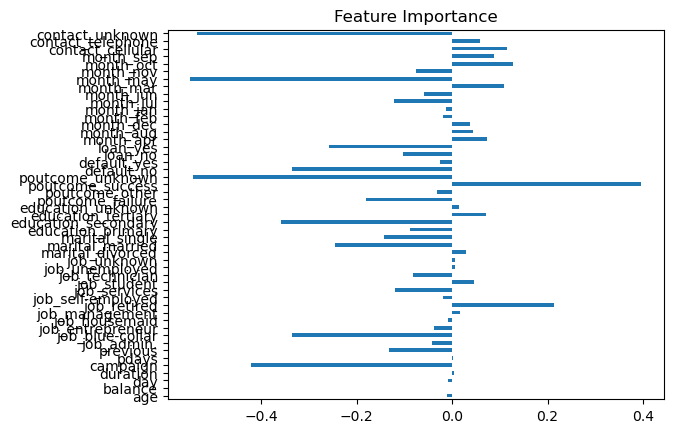

In [57]:
feature_importance = pd.Series(classifier.coef_[0], index=x.columns)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()